# **PROCEDIMIENTO DE REVISIÓN DEL CÓDIGO** #

### Primera parte

El primer paso para llevar a cabo este proceso fue revisar la factorización PLU, primeramente para matrices chicas (de hasta 10^3 x 10^3). Para ello el primer programa que realizamos para detectar errores, fue el de **"revision_factorizacion_PLU.py"** en el cual se encuentra la función "revision_PLU" y cuyo algoritmo es el siguiente:

1)Genera matrices aleatorias de diferentes dimensiones y entradas.<br>
2)Intenta calcular la inversa de calcular su inversa de la matriz A generada aleatoriamente, para que el producto con ésta regrese la matriz identidad y así garantizar que sea no singular.<br>
3)Realiza la factorización PLU con el algoritmo realizado por el equipo de programación.<br>
4)Compara los resultados del algoritmo desarrollado, cuyo output es **P,L,U** con las que se obtienen del paquete "scipy" con una tolerancia absoluta de 10^-05.<br>
5)Si la condición de la comparación del paso anterior es "verdadera" se arroja un status "Correcto", si esta condición no se cumple devuelve un archivo con la matriz A y las matrices PLU de ambos algoritmos. El archivo mencionado se ocupó para levantar algunos issues.<br>
6)Por último, devuelve un dataframe con las siguientes variables: dimensión, estado_plu, tiempo_plu (lo que tardó en correr la función para obtener las matrices PLU) y matrices_incorrectas.<br>

In [1]:
import revision_factorizacion_PLU

Los argurmentos que recibe la primera función **revision_PLU** :<br>
*Nombre del archivo, en este caso "resultados.txt<br>
*Número de corridas que se refiere a cuantas veces corrimos el algoritmo para hacer la revisión, en este caso 15<br>
*Límite inferior de la dimensión de la matriz, en este caso 10^2<br>
*Límite superiror de la dimensiónd de la matriz, en este caso 10^2+1<br>
*Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso -99.<br>
*Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso 99.<br>

In [2]:
revision_factorizacion_PLU.revision_PLU('resultados.txt',15,10**2,10**2+1,-99,99)

,dimension,status_plu,tiempo_plu,matrices_incorrectas
0,100,Incorrecto,0.409556,P
1,100,Incorrecto,0.438533,P
2,100,Incorrecto,0.383858,P
3,100,Incorrecto,0.384655,P
4,100,Incorrecto,0.386704,P
5,100,Incorrecto,0.388967,P
6,100,Incorrecto,0.389509,P
7,100,Incorrecto,0.402660,P
8,100,Incorrecto,0.394185,P
9,100,Incorrecto,0.394642,P


#### Comentarios
<i>Al ejecutar repetidas veces este programa, detectamos que la matriz que siempre salía con status incorrecto era la matriz de permutación (P) que, al revisar la documentación de "scipy", observamos que A=PLU, mientras que en nuestro algoritmo se cumple que PA=LU, por lo que P en ambos algoritmos no iban a ser iguales.</i>

### Segunda parte

Una vez detectado lo anterior, se decidió ya no usar el paquete "scipy" y sólo validar haciendo que PA=LU. 

Por lo que se realizó otro script llamado **"revision_modular.py"** en el cual, se encuentran principalmente las funciones de **revision_PLU**, **revision_x** y **revision_bloques**.

En la de revision_PLU se hace básicamente lo descrito en la primera parte de la revisión, pero se eliminó lo siguiente:<br>

1)Genera matrices genera matrices aleatorias de diferentes dimensiones y entradas.<br>
<del>2)Intenta calcular la inversa de calcular su inversa de la matriz A generada aleatoriamente, para que el producto con ésta regrese la matriz identidad y así garantizar que sea no singular.</del>->Este paso se eliminó porque se implementó en el código que realiza la factorización PLU.<br>
3)Realiza la factorización PLU con el algoritmo realizado por el equipo de programación.<br>
<del>4)Compara los resultados del algoritmo desarrollado, cuyo output es **P,L,U** con las que se obtienen del paquete "scipy" con una tolerancia absoluta de 10^-05.</del>->Este paso se modifico a comprobar que PU=LU por la conclusión de la primera revisión.<br>
5)Si la condición de la comparación del paso anterior es "verdadera" se arroja un status "Correcto",<del> si esta condición no se cumple devuelve un archivo con la matriz A y las matrices PLU de ambos algoritmos.</del>.<br>
6)Por último, devuelve un dataframe con las siguientes variables: dimensión, **el número de condición de la matriz A**, tiempo_plu (lo que tardó en correr la función para obtener las matrices PLU) y el estatus del algoritmo.<br>


In [3]:
import revision_modular

Los argurmentos que recibe la segunda función **revision_PLU**:<br>
*Número de corridas que se refiere a cuantas veces corrimos el algoritmo para hacer la revisión, en este caso 3.<br>
*Límite inferior de la dimensión de la matriz, en este caso 10^3<br>
*Límite superiror de la dimensiónd de la matriz, en este caso 10^3+1<br>
*Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso -99.<br>
*Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso 99.<br>

In [10]:
revision_modular.revision_PLU(3,10**3,10**3+1,-99,99)

,dimension_A,condicion_A,tiempo_plu,status_plu
0,1000,9559.743871,471.168289,Correcto
1,1000,2179.846643,472.405880,Correcto
2,1000,3497.732003,469.337301,Correcto


#### Comentarios
<i>Al hacer varias corridas detectamos que el programa estaba arrojando cálculos correctos.</i>

### Tercera parte

Lo siguiente fue validar el valor de x con la función "revision_x" y cuyo algoritmo es el siguiente:<br>
1)Genera matrices aleatorias de diferentes dimensiones y entradas.<br>
2)Se calcula el número de condición de la matriz A generada en el punto anteriror.<br>
3)Se genera aleatoriamente un vector x ("real")<br>
4)Se multiplica el vector x ("real") por la matriz A para obtener el lado derecho del sistema de ecuaciones lineales (b)<br>
5)Se ejecuta el algoritmo de programación para resolver el sistema de ecuaciones $AX=b$ y obtener la x estimada.<br>
6)Se comparan las x's con una tolerancia absoluta de 10^-05 y sí se cumple esto se arroja un status "Correcto" y se obtiene el promedio del error absoluto de ambos vectores.<br>
7)Se imprime un dataframe con las siguientes variables: dimension_A, condicion_A, tiempo_x (lo que tardó en correr la función para obtener el valor de x), estado_x y error_absoluto.

Los argurmentos que recibe la función **revision_x** :<br>
*Número de corridas que se refiere a cuantas veces corrimos el algoritmo para hacer la revisión, en este caso 10<br>
*Límite inferior de la dimensión de la matriz, en este caso 10^2<br>
*Límite superiror de la dimensiónd de la matriz, en este caso 10^2+1<br>
*Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso -99.<br>
*Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso 99.<br>

In [12]:
revision_modular.revision_x(3,10**3,10**3+1,-99,99)

,dimension_A,condicion_A,tiempo_x,estado_x,error_absoluto
0,1000,10761.740248,450.849671,Correcto,1.611627e-11
1,1000,1008.267266,433.907616,Correcto,1.756201e-12
2,1000,1747.701484,436.511382,Correcto,1.468873e-12


#### Comentarios
<i>Al hacer varias corridas detectamos que el programa estaba arrojando cálculos correctos para la X estimada en comparación con la X "real"</i>

### Cuarta parte

Finalmente pasamos a la revisión del algoritmo por bloques "solve_blocks", el cual integra el algoritmo de la factorización PLU (previamente revisado), la solución de X por bloques fue revisada con la funcion **"revision_bloques"** y el algoritmo que sigue esta función es el siguiente:<br>
1)Genera matrices genera matrices aleatorias de diferentes dimensiones y entradas.<br>
2)Genera el vector de X's aleatorio de dimensión n.<br>
3)Se calcula B con la operación $AX=B$.<br>
4)Se calcula el número de condición de la matriz A generada.<br>
5)Se ejecuta el algoritmo de programación para solver X por bloques.<br>
6)Se calcula el error absoluto entre la <i>Xestimada</i> y <i>Xreal</i>, para posteriormete calcular el promedio de esos errores absolutos.
6)Se comparan las X's con una tolerancia absoluta de 10^-05 y sí se cumple esto se arroja un status "Correcto".
7)Se imprime un dataframe con las siguientes variables: dimension_A, condicion_A, tiempo_bloques (lo que tardó en correr la función por bloques para resolver X) y el error_absoluto.

In [15]:
bloques=revision_modular.revision_bloques(5,10**2,10**3,-99,99)

Los argurmentos que recibe la función **revision_bloques** :<br>
*Número de corridas que se refiere a cuantas veces corrimos el algoritmo para hacer la revisión, en este caso 5<br>
*Límite inferior de la dimensión de la matriz, en este caso 10^2<br>
*Límite superiror de la dimensiónd de la matriz, en este caso 10^2+1<br>
*Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso -99.<br>
*Límite inferior de las entradas de A, es decir el valor de cada uno de los aij que puede tener la matriz, en este caso 99.<br>

In [16]:
bloques

,dimension_A,condicion_A,tiempo_bloques,solucion_bloques,error_absoluto
0,434,2796.933244,18.164421,Correcto,2.241180e-10
1,658,2233.835727,60.026703,Correcto,3.942179e-11
2,168,260.292139,1.170857,Correcto,5.552408e-12
3,390,1063.322292,12.789144,Correcto,6.942410e-11
4,544,1311.088979,34.097854,Correcto,1.424170e-11


In [22]:
bloques.sort_values(by=['dimension_A'],inplace=True)
dimension = bloques['dimension_A']
tiempo=bloques['tiempo_bloques']

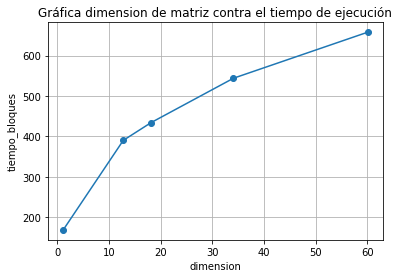

In [23]:
import matplotlib.pyplot as plt
plt.plot(tiempo,dimension,'o-')
plt.title('Gráfica dimension de matriz contra el tiempo de ejecución')
plt.xlabel('dimension')
plt.ylabel('tiempo_bloques')
plt.grid()
plt.show()

#### Comentarios
<i>Al hacer varias corridas detectamos que el programa estaba arrojando cálculos correctos para la X estimada con el algoritmo de bloques, y de igual forma obtuvimos que el error absoluto es en casi todos los casos de orden 10^-10 lo cual no indica que nuestro algoritmo tiene una buena aproximación. Finalmente hicimos una gráfica reprensenta la dimensión de la matriz contra el tiempo de ejecución del algoritmo y se obtiene que a mayor dimensión de la matriz generada mayo tiempo de ejecución, lo cual era lo esperado.</i>